In [80]:
import glob
import numpy as np
import pickle
from scipy import ndimage as ndimage
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import image
import os
import random
import matplotlib.animation as animation
import collections

In [81]:
def resize_gestures(input_gestures, final_length=100):

    output_gestures = np.array([np.array([ndimage.zoom(x_i.T[j], final_length / len(x_i), mode='reflect') for j in range(np.size(x_i, 1))]).T for x_i in input_gestures])
    return output_gestures

In [82]:
def load_gestures(root, resize_gesture_to_length=100):
   
  
    pattern = root + '/DHG/DHG2016/gesture_*/finger_*/subject_*/essai_*/skeleton_image.txt'

    gestures_filenames = sorted(glob.glob(pattern))
   
    gestures = [np.genfromtxt(f) for f in gestures_filenames]
    if resize_gesture_to_length is not None:
        gestures = resize_gestures(gestures, final_length=resize_gesture_to_length)

    labels_14 = [int(filename.split('/')[-5].split('_')[1]) for filename in gestures_filenames]

    return gestures, labels_14, gestures_filenames

In [83]:
gestures, labels_14, gestures_filenames = load_gestures(root=os.path.abspath(os.getcwd()),
                                     resize_gesture_to_length=100)

In [84]:
gestures = np.array(gestures)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(gestures,labels_14, test_size=0.3 )

In [86]:
X_test.shape

(840, 100, 44)

In [87]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [88]:
max(y_train)

14

In [89]:
from tensorflow.keras.utils import to_categorical

In [90]:
y_train = to_categorical(y_train, 15)

In [91]:
y_test = to_categorical(y_test, 15)

In [92]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten, TimeDistributed,Dropout
import keras.layers

In [93]:
import keras.backend as K

In [94]:
img_size = X_train[0].shape
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0],1, 100, 44)
    X_test = X_test.reshape(X_test.shape[0],1, 100, 44)
else:
    X_train = X_train.reshape(X_train.shape[0], 100, 44, 1)
    X_test = X_test.reshape(X_test.shape[0], 100, 44, 1)

In [95]:
input_shape1 = X_train.shape[1:]
input_shape1

(100, 44, 1)

In [96]:
import tensorflow as tf

In [97]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), strides = (1,1), padding='same', activation = 'relu',input_shape = input_shape1))
model.add(Conv2D(8, kernel_size=(3,3), strides = (1,1), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(3,3), strides = (1,1), padding='same', activation = 'relu'))
model.add(Conv2D(16, kernel_size=(3,3), strides = (1,1), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), strides = (1,1), padding='same', activation = 'relu'))
model.add(Conv2D(32, kernel_size=(3,3), strides = (1,1), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(TimeDistributed(Flatten()))

model.add(tf.keras.layers.LSTM(units =  128 ,activation = 'relu'))



model.add(Dense(units= 128, activation = 'relu'))

model.add(Dropout(0.2))
model.add(Dense(units= 128, activation = 'relu'))

model.add(Dropout(0.2))
model.add(Dense(units= 15, activation = 'softmax'))



#model.summary()



In [98]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [99]:
history = model.fit(X_train, y_train, batch_size= 64,epochs=100, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 11s 320ms/step - loss: 2.7587 - accuracy: 0.0816 - val_loss: 2.6311 - val_accuracy: 0.0587
Epoch 2/100
25/25 [==============================] - 8s 328ms/step - loss: 2.5938 - accuracy: 0.1180 - val_loss: 2.4198 - val_accuracy: 0.2602
Epoch 3/100
25/25 [==============================] - 9s 356ms/step - loss: 2.3713 - accuracy: 0.1901 - val_loss: 2.2351 - val_accuracy: 0.2985
Epoch 4/100
25/25 [==============================] - 8s 322ms/step - loss: 2.1979 - accuracy: 0.2519 - val_loss: 1.9861 - val_accuracy: 0.3597
Epoch 5/100
25/25 [==============================] - 7s 298ms/step - loss: 2.0770 - accuracy: 0.2812 - val_loss: 1.8786 - val_accuracy: 0.3954
Epoch 6/100
25/25 [==============================] - 9s 376ms/step - loss: 1.9393 - accuracy: 0.3284 - val_loss: 1.8129 - val_accuracy: 0.4005
Epoch 7/100
25/25 [==============================] - 10s 385ms/step - loss: 1.8019 - accuracy: 0.3699 - val_loss: 1.6910 - val_accuracy: 0.40

Epoch 58/100
25/25 [==============================] - 7s 298ms/step - loss: 0.2944 - accuracy: 0.8980 - val_loss: 0.5858 - val_accuracy: 0.8316
Epoch 59/100
25/25 [==============================] - 7s 297ms/step - loss: 0.2997 - accuracy: 0.8960 - val_loss: 0.6806 - val_accuracy: 0.8061
Epoch 60/100
25/25 [==============================] - 7s 296ms/step - loss: 0.3191 - accuracy: 0.8922 - val_loss: 0.6879 - val_accuracy: 0.7934
Epoch 61/100
25/25 [==============================] - 7s 298ms/step - loss: 0.2478 - accuracy: 0.9094 - val_loss: 0.7289 - val_accuracy: 0.7985
Epoch 62/100
25/25 [==============================] - 7s 298ms/step - loss: 0.2613 - accuracy: 0.9075 - val_loss: 0.7487 - val_accuracy: 0.8061
Epoch 63/100
25/25 [==============================] - 7s 299ms/step - loss: 0.2616 - accuracy: 0.9094 - val_loss: 0.7791 - val_accuracy: 0.8036
Epoch 64/100
25/25 [==============================] - 7s 297ms/step - loss: 0.2658 - accuracy: 0.9094 - val_loss: 0.6141 - val_accuracy:

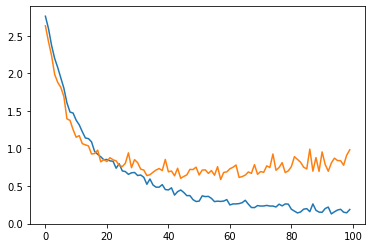

In [100]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

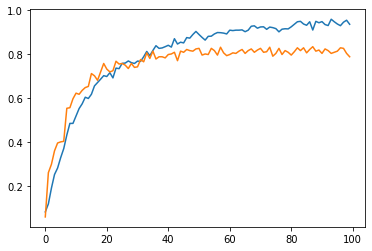

In [101]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

In [102]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 1s 45ms/step - loss: 1.0602 - accuracy: 0.7667


[1.060180902481079, 0.7666666507720947]

In [103]:
from sklearn.metrics import confusion_matrix,classification_report

In [104]:
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(model.predict(X_test), axis = 1)

confusion_matrix(y_true, y_pred)

27/27 [==============================] - 1s 39ms/step


array([[34,  0,  0, 12,  0,  1,  0,  0,  0,  4,  0,  0,  0,  1],
       [ 7, 38,  1,  2,  6,  0,  0,  3,  0, 15,  0,  0,  0,  2],
       [ 1,  2, 52,  0,  1,  0,  1,  0,  3,  0,  0,  0,  0,  1],
       [15,  2,  0, 23,  2,  2,  0,  0,  0,  6,  0,  0,  0,  0],
       [ 3,  0,  4,  0, 57,  0,  0,  2,  1,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  2, 47,  0,  0,  0,  6,  0,  0,  0,  1],
       [ 0,  3,  0,  0,  0,  0, 37,  0,  1,  0,  1,  5,  9,  2],
       [ 0,  1,  0,  0,  3,  1,  0, 50,  0,  6,  0,  1,  0,  0],
       [ 1,  1,  3,  0,  0,  1,  3,  0, 43,  0,  0,  3,  0,  1],
       [ 2,  0,  0,  0,  0,  2,  0,  4,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1, 55,  2,  1,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0, 43,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  4, 55,  0],
       [ 0,  0,  1,  0,  4,  0,  0,  1,  0,  1,  0,  2,  0, 58]])

In [105]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.65      0.59        52
           2       0.81      0.51      0.63        74
           3       0.85      0.85      0.85        61
           4       0.59      0.46      0.52        50
           5       0.76      0.81      0.79        70
           6       0.85      0.81      0.83        58
           7       0.88      0.64      0.74        58
           8       0.81      0.81      0.81        62
           9       0.86      0.77      0.81        56
          10       0.55      0.87      0.67        60
          11       0.96      0.87      0.92        63
          12       0.72      0.90      0.80        48
          13       0.85      0.90      0.87        61
          14       0.84      0.87      0.85        67

    accuracy                           0.77       840
   macro avg       0.78      0.77      0.76       840
weighted avg       0.78      0.77      0.77       840



# Misclassified instances analysis

In [106]:
classes = ['Grab', 'Tap', 'Expand', 'Pinch', 'Rotation CW', 'Rotation CCW', 'Swipe Right', 'Swipe Left', 'Swipe Up',
          'Swipe Down', 'Swipe X', 'Swipe V', 'Swipe +', 'Shake']

In [107]:
img_size = gestures[0].shape
if K.image_data_format() == 'channels_first':
    gesutres = gestures.reshape(gestures.shape[0],1, 100, 44)
else:
    gestures = gestures.reshape(gestures.shape[0], 100, 44, 1)
    

y_true = np.array(labels_14)
y_pred = np.argmax(model.predict(gestures), axis = 1)

88/88 [==============================] - 4s 41ms/step


In [108]:
errors = []
for i in range(gestures.shape[0]):
    true_class = y_true[i]
    pred_class = y_pred[i]
    if true_class != pred_class:
        errors.append(i)

In [109]:
def load_images_from_folder(folder):
    images = []
    mapa = {}
    for fileName in os.listdir(folder):
        if "depth" in fileName:
            niz = fileName.split('_')
            broj = niz[1].split('.')[0]
                        
            img = image.imread(os.path.join(folder,fileName))
            if img is not None:
                mapa[int(broj)] = img
               
    return mapa

In [136]:
randGest = random.choice(errors)

# dir path to specific gesture from errors 
# exmpl ../DHG/DHG2016/gesture_1/finger_2/subject_14/essai_5
gestPath = gestures_filenames[randGest]
lastDash = gestPath.rfind('/')
trueGesturePath = gestPath[:lastDash]


images = load_images_from_folder(trueGesturePath)
images = collections.OrderedDict(sorted(images.items()))

listImages = []
for key, value in images.items():
    listImages.append(value)


...

.

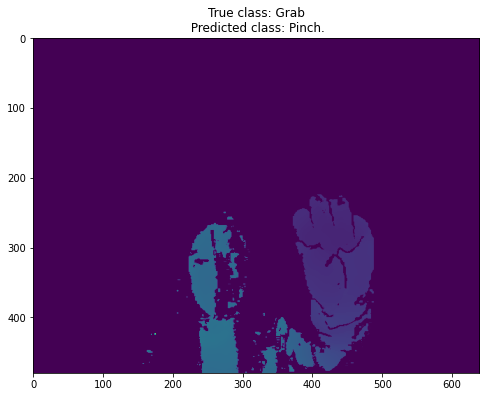

In [135]:
fps = 30
fig = plt.figure( figsize=(8,8) )

a = listImages[0]
im = plt.imshow(a)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
    
    im.set_array(listImages[i-1])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = len(listImages),
                               interval = 1000 / fps, # in ms
                               )

true = classes[y_true[randGest]-1]
predicted = classes[y_pred[randGest] -1]
naslov = "True class: {}\n Predicted class: {}.".format(true, predicted)
plt.title(naslov)
from IPython.display import HTML
HTML(anim.to_jshtml())